In [ ]:
import pandas as pd
import numpy as np

# Loading the data in

In [ ]:
five_min = pd.read_csv("./data/speeds/d07_text_station_5min_2012_09_06.txt.gz", compression="gzip", header=None)

### Changing header names

In [ ]:
colnames = five_min.columns
beginning_names = ["Timestamp",  
                   "Station", # Unique station identifier. Use this value to cross-reference with Metadata files. 
                   "District", 
                   "Freeway#",
                   'Direction', # Direction of Travel	N | S | E | W
                   "Lane Type", # A string indicating the type of lane. CD (Coll/Dist); CH (Conventional Highway); FF (Fwy-Fwy connector); FR (Off Ramp); HV (HOV); ML (Mainline); OR (On Ramp)
                   "Station Length", # Segment length covered by the station in miles/km.
                   "numSamples", # Total number of samples received for all lanes.
                   "percentObs", # (%) Percentage of individual lane points at this location that were observed (e.g. not imputed).
                   "Total Flow", # (Veh/5-min) Sum of flows over the 5-minute period across all lanes. Note that the basic 5-minute rollup normalizes flow by the number of good samples received from the controller.
                   "Avg Occupancy", # (%) Average occupancy across all lanes over the 5-minute period expressed as a decimal number between 0 and 1. 
                   "Avg Speed", # (mph) Flow-weighted average speed over the 5-minute period across all lanes. If flow is 0, mathematical average of 5-minute station speeds.
                   "Lane N Samples", # Number of good samples received for lane N. N ranges from 1 to the number of lanes at the location.
                   "Lane N Flow", # (Veh/5-min) Total flow for lane N over the 5-minute period normalized by the number of good samples.
                   "Lane N Avg Occ", # (%) Average occupancy for lane N expressed as a decimal number between 0 and 1. N ranges from 1 to the number of lanes at the location.
                   "Lane N Avg Speed", # (mph) Flow-weighted average of lane N speeds. If flow is 0, mathematical average of 5-minute lane speeds. N ranges from 1 to the number of lanes
                   "Lane N Observed"] # 1 indicates observed data, 0 indicates imputed.
new_names = beginning_names + list(colnames[len(beginning_names):])
five_min.columns = new_names

In [ ]:
five_min.head().iloc[:,0:20]

In [ ]:
five_min['Freeway#']

# Metadata

In [ ]:
import matplotlib.pyplot as plt
meta = pd.read_csv("./data/meta/d07_text_meta_2012_09_06.txt", sep="\t")
meta.head()

In [ ]:
plt.scatter(x=meta['Longitude'], y=meta['Latitude'])
plt.show()

# Analyse stuffs

In [ ]:
df = five_min.copy()

In [ ]:
df.dtypes[:18]

In [ ]:
df['Station'].value_counts() # 4617 staions, 288 timesteps/day

In [ ]:
speed = df[['Station', 'Avg Speed']]
station_list = list(speed['Station'].value_counts().keys())

In [ ]:
speed[speed['Station']==764824]['Avg Speed']

In [ ]:
station_chosen = []
for station in station_list:
    if speed[speed['Station']==station]['Avg Speed'].isna().sum() == 0:
        station_chosen.append(station)

In [ ]:
len(station_chosen)

In [ ]:
a = speed[speed['Station'].isin(station_chosen)]
a

In [ ]:
len(a)

In [ ]:
b = "1179 NEED ASD"
c = '1173'
print(c in b)

In [ ]:
# import zipfile
# import pandas as pd

# accident_codes=['1179','1180','1181','1182','1183', '1125'] 
# districts_accidents_no={}
# freeways_incidents_no={}

    
# with zipfile.ZipFile('./data/incidents/all_text_chp_incidents_month_2012_01.txt.zip') as z:
#     with z.open("all_text_chp_incidents_month_2012_01.txt.gz") as f:
#         incidents_month = pd.read_csv(f, header=None, compression="gzip")
        
# # select only columns: [incidence code, district, freeway]
# incidents_month=incidents_month[[4, 11, 14]]

# # drop na
# print('before dropna: ', incidents_month.shape)
# incidents_month = incidents_month.dropna()
# incidents_month[11] = incidents_month[11].astype('int32')
# print('after dropna: ', incidents_month.shape)

# # Choose only rows with specific codes
# incidents_month=incidents_month[incidents_month[4].str.contains('|'.join(accident_codes))]
# print('No. rows with specific codes: ',incidents_month.shape)

# # extract number of accidents in districts
# districts_name = incidents_month[11].value_counts().keys()
# for district in districts_name:
#     total_accidents = incidents_month[incidents_month[11]==district]
#     if district in districts_accidents_no:
#         districts_accidents_no[district] += total_accidents.shape[0]
#     else:
#         districts_accidents_no[district] = total_accidents.shape[0]

# # extract number of accidents in freeway
# freeways_name = incidents_month[14].value_counts().keys()
# for freeway in freeways_name:
#     total_accidents = incidents_month[incidents_month[14]==freeway]
#     if freeway in freeways_incidents_no:
#         freeways_incidents_no[freeway] += total_accidents.shape[0]
#     else:
#         freeways_incidents_no[freeway] = total_accidents.shape[0]

# print('districts_accidents_no: ', districts_accidents_no)
# print('freeways_incidents_no: ', freeways_incidents_no)

# # z.close()

# Higher accident rate

In [25]:
import zipfile
import pandas as pd
import glob, os
import matplotlib.pyplot as plt


class bcolors:
    OK = '\033[92m\033[1m' #GREEN
    WARNING = '\033[93m\033[1m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR


def count_incidents_each_file(zip_file, gz_file):

    with zipfile.ZipFile(zip_file) as z:
        with z.open(gz_file) as f:
            incidents_month = pd.read_csv(f, header=None, compression="gzip")
        
    # select only columns: [incidence code, district, freeway]
    incidents_month=incidents_month[[4, 11, 14]]

    # drop na
    print('before dropna: ', incidents_month.shape)
    incidents_month = incidents_month.dropna()
    incidents_month[11] = incidents_month[11].astype('int32')
    print('after dropna: ', incidents_month.shape)

    # Choose only rows with specific codes
    incidents_month=incidents_month[incidents_month[4].str.contains('|'.join(accident_codes))]
    print('No. rows with specific codes: ',incidents_month.shape)

    # extract number of accidents in districts
    districts_name = incidents_month[11].value_counts().keys()
    for district in districts_name:
        total_accidents = incidents_month[incidents_month[11]==district]
        if district in districts_accidents_no:
            districts_accidents_no[district] += total_accidents.shape[0]
        else:
            districts_accidents_no[district] = total_accidents.shape[0]

    # extract number of accidents in freeway
    freeways_name = incidents_month[14].value_counts().keys()
    for freeway in freeways_name:
        total_accidents = incidents_month[incidents_month[14]==freeway]
        if freeway in freeways_incidents_no:
            freeways_incidents_no[freeway] += total_accidents.shape[0]
        else:
            freeways_incidents_no[freeway] = total_accidents.shape[0]
    

def count_incidents_all_files(incidents_ospath):
    
    all_incidents_files = glob.glob(incidents_ospath + '*.txt.zip')
    print('File found:', all_incidents_files)
    for incidents_file in all_incidents_files:
        gz_file = incidents_file[17:].replace('zip', 'gz')
        print('---\nScanning: {}'.format(gz_file))
        try:
            count_incidents_each_file(incidents_file, gz_file)
        except:
            print(bcolors.WARNING + "File '{}' is corrupted".format(gz_file) + bcolors.RESET)
        else:
            print(bcolors.OK + "Done: {}".format(gz_file) + bcolors.RESET)            

incidents_path = './data/incidents/'
accident_codes=['1179','1180','1181','1182','1183', '1125']
districts_accidents_no={}
freeways_incidents_no={}    
    
count_incidents_all_files(incidents_path)  
#     print('districts_accidents_no: ', districts_accidents_no)
#     print('freeways_incidents_no: ', freeways_incidents_no)    


File found: ['./data/incidents/all_text_chp_incidents_month_2012_03.txt.zip', './data/incidents/all_text_chp_incidents_month_2012_04.txt.zip', './data/incidents/all_text_chp_incidents_month_2012_05.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_04.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_06.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_03.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_08.txt.zip', './data/incidents/all_text_chp_incidents_month_2012_11.txt.zip', './data/incidents/all_text_chp_incidents_month_2012_02.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_09.txt.zip', './data/incidents/all_text_chp_incidents_month_2012_12.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_12.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_11.txt.zip', './data/incidents/all_text_chp_incidents_month_2013_05.txt.zip', './data/incidents/all_text_chp_incidents_month_2012_06.txt.zip', './data/inci

/home/keni/venvs/venv-pull-data-pems/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


before dropna:  (43620, 3)
after dropna:  (40985, 3)
No. rows with specific codes:  (35843, 3)
Done: all_text_chp_incidents_month_2012_07.txt.gz
---
Scanning: all_text_chp_incidents_month_2012_10.txt.gz
before dropna:  (42229, 3)
after dropna:  (41753, 3)
No. rows with specific codes:  (37093, 3)
Done: all_text_chp_incidents_month_2012_10.txt.gz
---
Scanning: all_text_chp_incidents_month_2013_02.txt.gz
before dropna:  (34496, 3)
after dropna:  (33820, 3)
No. rows with specific codes:  (30210, 3)
Done: all_text_chp_incidents_month_2013_02.txt.gz


In [26]:
print('districts_accidents_no: ', districts_accidents_no)
print('freeways_incidents_no: ', freeways_incidents_no) 

districts_accidents_no:  {7: 269268, 4: 168800, 8: 93683, 12: 75385, 11: 68453, 3: 53426, 6: 20418, 5: 21147, 10: 18998, 2: 5314, 1: 3964, 9: 267}
freeways_incidents_no:  {5: 99938, 101: 77701, 10: 55393, 405: 52008, 80: 39069, 91: 36460, 15: 36182, 60: 29048, 99: 24547, 210: 24825, 110: 21880, 605: 16829, 880: 19558, 580: 18174, 280: 16372, 680: 15741, 710: 13334, 50: 13072, 57: 10579, 105: 10164, 215: 14851, 8: 9750, 805: 9224, 134: 7380, 118: 6725, 4: 7099, 1: 5916, 55: 7950, 14: 6559, 17: 4568, 22: 5906, 51: 4733, 85: 4576, 78: 4360, 24: 4700, 170: 2911, 41: 2730, 2: 1133, 94: 3448, 163: 3033, 58: 1251, 52: 2354, 87: 2417, 92: 3129, 71: 1920, 65: 1294, 12: 1348, 180: 1587, 125: 1948, 18: 365, 198: 1247, 67: 856, 73: 1344, 54: 1138, 74: 405, 152: 1031, 205: 1372, 23: 1003, 126: 960, 395: 316, 241: 521, 120: 723, 29: 923, 37: 957, 237: 1692, 33: 471, 178: 413, 79: 298, 168: 808, 76: 226, 116: 225, 242: 947, 13: 559, 43: 145, 238: 850, 108: 138, 70: 853, 780: 702, 132: 124, 49: 231, 8

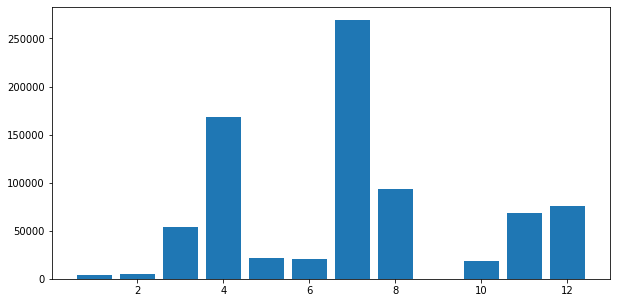

In [27]:
fig = plt.figure(figsize=(10,5))
plt.bar(*zip(*districts_accidents_no.items()))
plt.show()

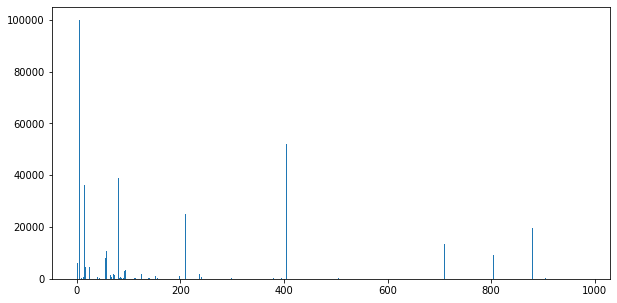

In [28]:
fig = plt.figure(figsize=(10,5))
plt.bar(*zip(*freeways_incidents_no.items()))
plt.show()

In [29]:
{k: v for k, v in sorted(freeways_incidents_no.items(), key=lambda item: item[1])}

{232: 1,
 456: 1,
 124: 1,
 191: 1,
 408: 1,
 148: 1,
 228: 1,
 368: 1,
 272: 1,
 208: 1,
 77: 1,
 324: 1,
 211: 1,
 322: 1,
 239: 1,
 104: 1,
 197: 1,
 244: 1,
 102: 1,
 220: 1,
 45: 1,
 256: 1,
 320: 1,
 253: 1,
 271: 1,
 176: 1,
 304: 1,
 53: 1,
 188: 2,
 229: 2,
 196: 2,
 620: 2,
 269: 2,
 114: 2,
 136: 2,
 174: 2,
 420: 2,
 146: 2,
 127: 2,
 264: 2,
 151: 2,
 306: 2,
 182: 3,
 252: 3,
 139: 3,
 27: 3,
 245: 3,
 142: 3,
 7: 3,
 263: 3,
 416: 3,
 162: 3,
 218: 4,
 195: 4,
 267: 4,
 255: 4,
 273: 4,
 16: 5,
 61: 6,
 203: 6,
 158: 6,
 112: 6,
 236: 6,
 284: 7,
 39: 8,
 36: 8,
 175: 8,
 200: 9,
 6: 10,
 96: 10,
 177: 10,
 192: 12,
 201: 13,
 123: 14,
 216: 15,
 97: 15,
 32: 15,
 137: 16,
 115: 16,
 19: 17,
 28: 18,
 34: 20,
 223: 20,
 155: 20,
 199: 20,
 95: 21,
 202: 21,
 219: 25,
 183: 26,
 247: 26,
 3: 26,
 227: 26,
 26: 27,
 25: 28,
 173: 28,
 246: 30,
 150: 31,
 262: 31,
 103: 33,
 189: 34,
 98: 34,
 131: 37,
 166: 37,
 63: 38,
 184: 39,
 130: 39,
 145: 40,
 243: 40,
 129: 41,
 88

In [ ]:
# incidences = pd.read_csv("./data/incidents/all_text_chp_incident_day_2012_09_06.txt.gz", compression="gzip", header=None)
# colnames = incidences.columns
# beginning_names = ["Incident ID",  
#                    "CC Code",  
#                    "Incident Number", 
#                    "Timestamp",
#                    'Description', 
#                    "Location", 
#                    "Area", 
#                    "Zoom Map", 
#                    "TB xy", 
#                    "Latitude", 
#                    "Longitude",  
#                    "District", 
#                    "County FIPS ID", 
#                    "City FIPS ID", 
#                    "Freeway Number",
#                    "Freeway Direction",
#                    "State Postmile", 
#                    "Absolute Postmile",
#                    "Severity",
#                    "Duration"] # 1 indicates observed data, 0 indicates imputed.
# new_names = beginning_names + list(colnames[len(beginning_names):])
# incidences.columns = new_names
# incidences[['Incident ID', 'Timestamp', 'Description', 'Location', 'Area', 'Latitude', 'Longitude', 'District', 'Freeway Number', 'Freeway Direction']].head()